In [2]:
import grib2io
import numpy as np
import xarray as xr
from datetime import datetime
from mpl_toolkits.basemap import Basemap
from pyproj import Proj

In [4]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib
matplotlib.rcParams.update({
 "savefig.facecolor": "w",
 "figure.facecolor" : 'w',
 "figure.figsize" : (10,8),
 "text.color": "k",
 "legend.fontsize" : 20,
 "font.size" : 30,
 "axes.edgecolor": "k",
 "axes.labelcolor": "k",
 "axes.linewidth": 3,
 "xtick.color": "k",
 "ytick.color": "k",
 "xtick.labelsize" : 25,
 "ytick.labelsize" : 25,
 "ytick.major.size" : 12,
 "xtick.major.size" : 12,
 "ytick.major.width" : 2,
 "xtick.major.width" : 2,
 "font.family": 'STIXGeneral',
 "mathtext.fontset" : "cm"})

## grib2io

In [6]:
adam_dat_dir = '/scratch1/NCEPDEV/mdl/Adam.Schnapp/noscrub/data/gefs/20230129/atmos/'
g = grib2io.open(adam_dat_dir+'gep06.t12z.pgrb2ab.0p50')

In [99]:
#printing g gives a high level overview of the messages included in the file
#variables are parameter short names
#levels are the region of atmosphere, quantified by height, pressure, or cloud conditions, each variable is associated with
print(g)

mode = rb
name = /scratch1/NCEPDEV/mdl/Adam.Schnapp/noscrub/data/gefs/20230129/atmos/gep06.t12z.pgrb2ab.0p50
messages = 38304
current_message = 0
size = 7284523833
closed = False
variables = ('4LFTX', '5WAVH', 'ABSV', 'ACPCP', 'ALBDO', 'APCP', 'APTMP', 'BRTMP', 'CAPE', 'CDUVB', 'CFRZR', 'CICEP', 'CIN', 'CLMR', 'CNWAT', 'CPOFP', 'CPRAT', 'CRAIN', 'CSNOW', 'CWAT', 'CWORK', 'DLWRF', 'DPT', 'DSWRF', 'DUVB', 'FLDCP', 'FRICV', 'GFLUX', 'GUST', 'HGT', 'HINDEX', 'HLCY', 'HPBL', 'ICAHT', 'ICEC', 'ICETK', 'ICIP', 'ICSEV', 'LAND', 'LFT X', 'LHTFL', 'MNTSF', 'MSLET', 'NCPCP', 'O3MR', 'PEVPR', 'PLI', 'PLPL', 'POT', 'PRATE', 'PRES', 'PRMSL', 'PVORT', 'PWAT', 'RH', 'SFCR', 'SHTFL', 'SNOD', 'SNOHF', 'SNOWC', 'SOILL', 'SOILW', 'SPFH', 'SUNSD', 'TCDC', 'TMAX', 'TMIN', 'TMP', 'TOZNE', 'TSOIL', 'U-GWD', 'UFLX', 'UGRD', 'ULWRF', 'USTM', 'USWRF', 'V-GWD', 'VFLX', 'VGRD', 'VIS', 'VRATE', 'VSTM', 'VVEL', 'VWSH', 'WATR', 'WEASD', 'WILT')
levels = ('0-0.1 m underground', '0.1-0.4 m underground', '0.33-1 sigma l

In [22]:
msgs = g['TMP'] #get messages dealing with temperature == TMP
msgs[0]

Section 0: discipline = 0 - Meteorological Products
Section 1: originatingCenter = 7 - US National Weather Service - NCEP (WMC)
Section 1: originatingSubCenter = 2 - NCEP Ensemble Products
Section 1: masterTableInfo = 2 - Version Implemented on 4 November 2003
Section 1: localTableInfo = 1 - Number of local table version used.
Section 1: significanceOfReferenceTime = 1 - Start of Forecast
Section 1: year = 2023
Section 1: month = 1
Section 1: day = 29
Section 1: hour = 12
Section 1: minute = 0
Section 1: second = 0
Section 1: refDate = 2023-01-29 12:00:00
Section 1: productionStatus = 0 - Operational Products
Section 1: typeOfData = 4 - Perturbed Forecast Products
Section 3: interpretationOfListOfNumbers = 0 - There is no appended list
Section 3: gridDefinitionTemplateNumber = 0 - Latitude/Longitude
Section 3: shapeOfEarth = 6 - Earth assumed spherical with radius = 6,371,229.0 m
Section 3: earthRadius = 6371229.0
Section 3: earthMajorAxis = None
Section 3: earthMinorAxis = None
Sectio

In [28]:
g.levels_by_var('TMP')

['0.995 sigma level',
 '1 hybrid level',
 '1 mb',
 '10 mb',
 '100 m above ground',
 '100 mb',
 '1000 mb',
 '120-90 mb above ground',
 '150 mb',
 '150-120 mb above ground',
 '180-150 mb above ground',
 '1829 m above mean sea level',
 '2 hybrid level',
 '2 m above ground',
 '2 mb',
 '20 mb',
 '200 mb',
 '250 mb',
 '2743 m above mean sea level',
 '3 hybrid level',
 '3 mb',
 '30 mb',
 '30-0 mb above ground',
 '300 mb',
 '305 m above mean sea level',
 '320 K isentropic level',
 '350 mb',
 '3658 m above mean sea level',
 '4 hybrid level',
 '400 mb',
 '450 K isentropic level',
 '450 mb',
 '457 m above mean sea level',
 '4572 m above mean sea level',
 '5 mb',
 '50 mb',
 '500 mb',
 '550 K isentropic level',
 '550 mb',
 '60-30 mb above ground',
 '600 mb',
 '610 m above mean sea level',
 '650 K isentropic level',
 '650 mb',
 '7 mb',
 '70 mb',
 '700 mb',
 '750 mb',
 '80 m above ground',
 '800 mb',
 '850 mb',
 '90-60 mb above ground',
 '900 mb',
 '914 m above mean sea level',
 '925 mb',
 '950 mb',


In [30]:
msgs = g.select(shortName='TMP', level='2 m above ground')

In [103]:
g.variables #is there a way to get full names for all variables?

('4LFTX',
 '5WAVH',
 'ABSV',
 'ACPCP',
 'ALBDO',
 'APCP',
 'APTMP',
 'BRTMP',
 'CAPE',
 'CDUVB',
 'CFRZR',
 'CICEP',
 'CIN',
 'CLMR',
 'CNWAT',
 'CPOFP',
 'CPRAT',
 'CRAIN',
 'CSNOW',
 'CWAT',
 'CWORK',
 'DLWRF',
 'DPT',
 'DSWRF',
 'DUVB',
 'FLDCP',
 'FRICV',
 'GFLUX',
 'GUST',
 'HGT',
 'HINDEX',
 'HLCY',
 'HPBL',
 'ICAHT',
 'ICEC',
 'ICETK',
 'ICIP',
 'ICSEV',
 'LAND',
 'LFT X',
 'LHTFL',
 'MNTSF',
 'MSLET',
 'NCPCP',
 'O3MR',
 'PEVPR',
 'PLI',
 'PLPL',
 'POT',
 'PRATE',
 'PRES',
 'PRMSL',
 'PVORT',
 'PWAT',
 'RH',
 'SFCR',
 'SHTFL',
 'SNOD',
 'SNOHF',
 'SNOWC',
 'SOILL',
 'SOILW',
 'SPFH',
 'SUNSD',
 'TCDC',
 'TMAX',
 'TMIN',
 'TMP',
 'TOZNE',
 'TSOIL',
 'U-GWD',
 'UFLX',
 'UGRD',
 'ULWRF',
 'USTM',
 'USWRF',
 'V-GWD',
 'VFLX',
 'VGRD',
 'VIS',
 'VRATE',
 'VSTM',
 'VVEL',
 'VWSH',
 'WATR',
 'WEASD',
 'WILT')

In [41]:
#let's plot

lats, lons = msgs[0].grid()
m = Basemap(projection='lcc',lon_0=-100,lat_0=35,width=5e6,height=5e6,resolution='i')
#basemap just makes a projection plot upon which we can lay our data since it's gridded
xx, yy = m(lons, lats) #note to self, x=lons y=lats

In [44]:
print(msgs[0].units)
data = msgs[0].data

K


In [45]:
from metpy.units import units
temp_data = data * units.kelvin

In [46]:
temp_data.to(units.fahrenheit)

Magnitude,[[-25.54505157470703 -25.54505157470703 -25.54505157470703 ... -25.54505157470703 -25.54505157470703 -25.54505157470703] [-25.49105453491211 -25.509071350097656 -25.509071350097656 ... -25.455074310302734 -25.473064422607422 -25.473064422607422] [-24.897050857543945 -24.93305778503418 -24.951047897338867 ... -24.86107063293457 -24.879060745239258 -24.897050857543945] ... [-24.86107063293457 -24.86107063293457 -24.86107063293457 ... -24.843053817749023 -24.843053817749023 -24.843053817749023] [-25.56307029724121 -25.56307029724121 -25.56307029724121 ... -25.54505157470703 -25.54505157470703 -25.56307029724121] [-25.8150691986084 -25.8150691986084 -25.8150691986084 ... -25.8150691986084 -25.8150691986084 -25.8150691986084]]
Units,degree_Fahrenheit


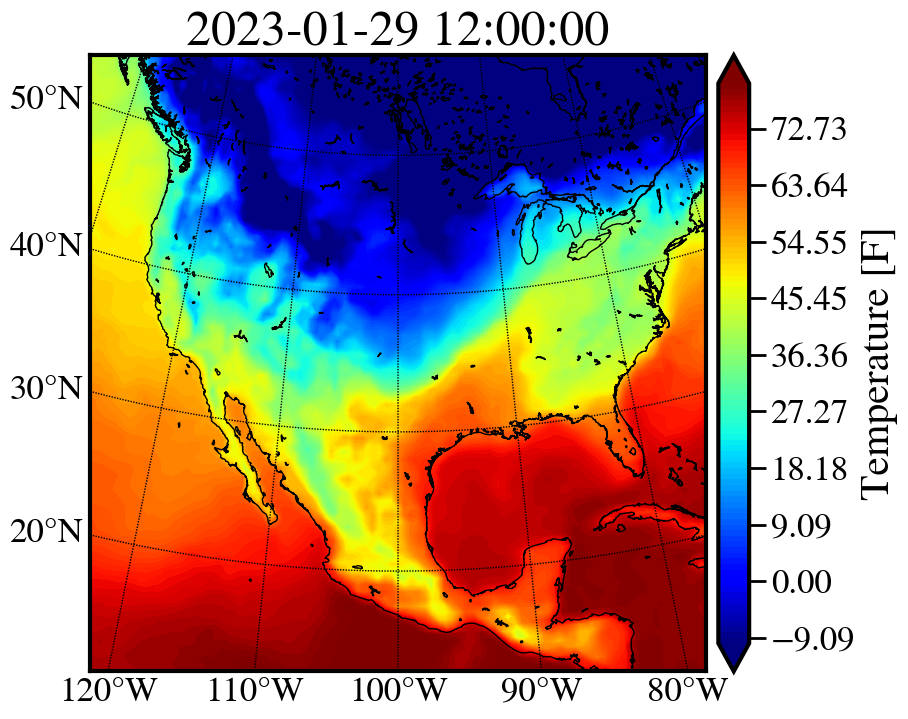

In [52]:
cs = m.contourf(xx,yy,temp_data.to(units.fahrenheit),levels=np.linspace(-10,80,100),cmap=plt.cm.jet,extend='both')
m.colorbar(location='right',label='Temperature [F]')

m.drawcoastlines()
m.drawparallels(np.arange(-90.,120.,10.), labels=[1,0,0,0],fontsize=25)
m.drawmeridians(np.arange(0.,360.,10.), labels=[0,0,0,1],fontsize=25)
plt.title(msgs[0].refDate
         )
plt.show()

## xarray

In [7]:
#we can do the same thing now with the xarray backend, powered by the grib2io engine

filters = dict(shortName='TMP', productDefinitionTemplateNumber=1, typeOfFirstFixedSurface=103)
#filter down the **massive** nd dataframe using diff parameters
#product def == forecast, average, min/max, etc.
#fixed surface == height or pressure level
#i think you have to specify at least 2?

#if you want all variables, need to select 1 product def and 1 surface
#if you select 1 variable, you can have diff products or diff levels

test = xr.open_dataset(adam_dat_dir+'gep06.t12z.pgrb2ab.0p50', engine='grib2io', filters=filters)

In [8]:
test

<xarray.Dataset>
Dimensions:                   (leadTime: 65, valueOfFirstFixedSurface: 3,
                               y: 361, x: 720)
Coordinates:
    refDate                   datetime64[ns] ...
  * leadTime                  (leadTime) timedelta64[ns] 0 days 00:00:00 ... ...
  * valueOfFirstFixedSurface  (valueOfFirstFixedSurface) float64 2.0 80.0 100.0
    perturbationNumber        int64 ...
    latitude                  (y, x) float64 ...
    longitude                 (y, x) float64 ...
    validDate                 (leadTime) datetime64[ns] ...
Dimensions without coordinates: y, x
Data variables:
    TMP                       (leadTime, valueOfFirstFixedSurface, y, x) float32 ...
Attributes:
    engine:   grib2io

In [9]:
test.TMP.data[test.leadTime == np.timedelta64(0,'ns'),test.valueOfFirstFixedSurface==2.0] 
#grab data for a specific forecast time and level

array([[[241.18053, 241.18053, 241.18053, ..., 241.18053, 241.18053,
         241.18053],
        [241.21053, 241.20052, 241.20052, ..., 241.23051, 241.22052,
         241.22052],
        [241.54053, 241.52052, 241.51053, ..., 241.56052, 241.55052,
         241.54053],
        ...,
        [241.56052, 241.56052, 241.56052, ..., 241.57053, 241.57053,
         241.57053],
        [241.17052, 241.17052, 241.17052, ..., 241.18053, 241.18053,
         241.17052],
        [241.03052, 241.03052, 241.03052, ..., 241.03052, 241.03052,
         241.03052]]], dtype=float32)

In [10]:
test.coords

Coordinates:
    refDate                   datetime64[ns] ...
  * leadTime                  (leadTime) timedelta64[ns] 0 days 00:00:00 ... ...
  * valueOfFirstFixedSurface  (valueOfFirstFixedSurface) float64 2.0 80.0 100.0
    perturbationNumber        int64 ...
    latitude                  (y, x) float64 ...
    longitude                 (y, x) float64 ...
    validDate                 (leadTime) datetime64[ns] ...

In [11]:
#interp?
nbm_grid_def = test.grib2io.griddef()
nbm_grid = test.TMP.grib2io.interp('bilinear', nbm_grid_def)

In [12]:
m = Basemap(projection='lcc',lon_0=-100,lat_0=35,width=5e6,height=5e6,resolution='i')

In [13]:

lats, lons = test.TMP.latitude.data, test.TMP.longitude.data
xx, yy = m(lons, lats)

In [14]:
temp = test.TMP.data[test.leadTime == np.timedelta64(0,'ns'),test.valueOfFirstFixedSurface==2.0][0] * units.kelvin

NameError: name 'units' is not defined

In [ ]:
#norm = colors.Normalize(vmin=-10, vmax=100)
cs = m.contourf(xx,yy,temp.to('fahrenheit'),levels=np.linspace(-10,100,100),cmap=plt.cm.jet, extend='min')

m.colorbar(location='right',label='Temperature [F]')

m.drawcoastlines()
m.drawparallels(np.arange(-90.,120.,10.), labels=[1,0,0,0],fontsize=25)
m.drawmeridians(np.arange(0.,360.,10.), labels=[0,0,0,1],fontsize=25)
plt.title(test.TMP.refDate.data
         )
plt.show()

In [65]:
test.TMP.dims
#dims are coords?

('leadTime', 'valueOfFirstFixedSurface', 'y', 'x')

In [69]:
np.shape(test.latitude.data)

(361, 720)

In [71]:
np.shape(test.longitude)

(361, 720)

In [70]:
np.shape(test.TMP.data) #dims = (leadTime, level, lat, lon)

(65, 3, 361, 720)

## how to filter grib2 files

In [78]:
msgs[10]

Section 0: discipline = 0 - Meteorological Products
Section 1: originatingCenter = 7 - US National Weather Service - NCEP (WMC)
Section 1: originatingSubCenter = 2 - NCEP Ensemble Products
Section 1: masterTableInfo = 2 - Version Implemented on 4 November 2003
Section 1: localTableInfo = 1 - Number of local table version used.
Section 1: significanceOfReferenceTime = 1 - Start of Forecast
Section 1: year = 2023
Section 1: month = 1
Section 1: day = 29
Section 1: hour = 12
Section 1: minute = 0
Section 1: second = 0
Section 1: refDate = 2023-01-29 12:00:00
Section 1: productionStatus = 0 - Operational Products
Section 1: typeOfData = 4 - Perturbed Forecast Products
Section 3: interpretationOfListOfNumbers = 0 - There is no appended list
Section 3: gridDefinitionTemplateNumber = 0 - Latitude/Longitude
Section 3: shapeOfEarth = 6 - Earth assumed spherical with radius = 6,371,229.0 m
Section 3: earthRadius = 6371229.0
Section 3: earthMajorAxis = None
Section 3: earthMinorAxis = None
Sectio

In [15]:
filters = dict(shortName='TMP', productDefinitionTemplateNumber=1, typeOfFirstFixedSurface=103, forecastTime=60)
test2 = xr.open_dataset(adam_dat_dir+'gep06.t12z.pgrb2ab.0p50', engine='grib2io', filters=filters)

In [16]:
test2

<xarray.Dataset>
Dimensions:                   (valueOfFirstFixedSurface: 3, y: 361, x: 720)
Coordinates:
    refDate                   datetime64[ns] ...
    leadTime                  timedelta64[ns] ...
  * valueOfFirstFixedSurface  (valueOfFirstFixedSurface) float64 2.0 80.0 100.0
    perturbationNumber        int64 ...
    latitude                  (y, x) float64 ...
    longitude                 (y, x) float64 ...
    validDate                 datetime64[ns] ...
Dimensions without coordinates: y, x
Data variables:
    TMP                       (valueOfFirstFixedSurface, y, x) float32 ...
Attributes:
    engine:   grib2io

In [18]:
test2.leadTime.data

array(216000000000000, dtype='timedelta64[ns]')

In [88]:
np.shape(test2.TMP[test2.valueOfFirstFixedSurface==2.0][0].data)

(361, 720)

In [89]:
test2.TMP[test2.valueOfFirstFixedSurface==2.0][0].data - msgs[10].data
#check that this did what i wanted it to: pick the temp for forecast time = 60 at 2m above ground

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## is there a fast way to filter?

In [93]:
import timeit

Say we already know what meta data and variables are in our grib2 file. How should we go about filtering down to what we want?

- temp
- 2 m above ground
- at a forecast time of 60

In [109]:
#start_time = timeit.default_timer()
filters = dict(shortName='TMP', productDefinitionTemplateNumber=1, level ="2 m above ground", leadTime=np.datetime64())
test2 = xr.open_dataset(adam_dat_dir+'gep06.t12z.pgrb2ab.0p50', engine='grib2io', filters=filters)
#print(timeit.default_timer() - start_time)

In [110]:
test2

<xarray.Dataset>
Dimensions:                   (y: 361, x: 720)
Coordinates:
    refDate                   datetime64[ns] ...
    leadTime                  timedelta64[ns] ...
    valueOfFirstFixedSurface  float64 ...
    perturbationNumber        int64 ...
    latitude                  (y, x) float64 ...
    longitude                 (y, x) float64 ...
    validDate                 datetime64[ns] ...
Dimensions without coordinates: y, x
Data variables:
    TMP                       (y, x) float32 ...
Attributes:
    engine:   grib2io

In [114]:
#start_time = timeit.default_timer()
filters = dict(productDefinitionTemplateNumber=1, level ="2 m above ground")
test2 = xr.open_dataset(adam_dat_dir+'gep06.t12z.pgrb2ab.0p50', engine='grib2io', filters=filters)
#print(timeit.default_timer() - start_time)

In [108]:
test2.TMP.attrs

{'GRIB2IO_section0': array([1196575042,          0,          0,          2,     246588]),
 'GRIB2IO_section1': array([   7,    2,    2,    1,    1, 2023,    1,   29,   12,    0,    0,
           0,    4]),
 'GRIB2IO_section3': array([        0,    259920,         0,         0,         0,         6,
                0,         0,         0,         0,         0,         0,
              720,       361,         0,        -1,  90000000,         0,
               48, -90000000, 359500000,    500000,    500000,         0]),
 'GRIB2IO_section4': array([  0,   1,   0,   0,   4,   0, 107,   0,   0,   1,   0, 103,   0,
          2, 255,   0,   0,   3,   6,  30]),
 'fullName': 'Temperature',
 'shortName': 'TMP',
 'units': 'K'}

In [117]:
test2.leadTime

<xarray.DataArray 'leadTime' (leadTime: 65)>
array([               0,   21600000000000,   43200000000000,   64800000000000,
         86400000000000,  108000000000000,  129600000000000,  151200000000000,
        172800000000000,  194400000000000,  216000000000000,  237600000000000,
        259200000000000,  280800000000000,  302400000000000,  324000000000000,
        345600000000000,  367200000000000,  388800000000000,  410400000000000,
        432000000000000,  453600000000000,  475200000000000,  496800000000000,
        518400000000000,  540000000000000,  561600000000000,  583200000000000,
        604800000000000,  626400000000000,  648000000000000,  669600000000000,
        691200000000000,  712800000000000,  734400000000000,  756000000000000,
        777600000000000,  799200000000000,  820800000000000,  842400000000000,
        864000000000000,  885600000000000,  907200000000000,  928800000000000,
        950400000000000,  972000000000000,  993600000000000, 1015200000000000,
       1036800000000000, 1058400000000000, 1080000000000000, 1101600000000000,
       1123200000000000, 1144800000000000, 1166400000000000, 1188000000000000,
       1209600000000000, 1231200000000000, 1252800000000000, 1274400000000000,
       1296000000000000, 1317600000000000, 1339200000000000, 1360800000000000,
       1382400000000000], dtype='timedelta64[ns]')
Coordinates:
    refDate                   datetime64[ns] ...
  * leadTime                  (leadTime) timedelta64[ns] 0 days 00:00:00 ... ...
    valueOfFirstFixedSurface  float64 ...
    perturbationNumber        int64 ...
    validDate                 (leadTime) datetime64[ns] ...
Attributes:
    grib_name:  leadTime

In [112]:
start_time = timeit.default_timer()


msg=test2.TMP[test2.leadTime==60]

print(timeit.default_timer() - start_time)

ValueError: 0d-boolean array is used for indexing along dimension 'y', but only 1d boolean arrays are supported.

In [96]:
start_time = timeit.default_timer()
g = grib2io.open(adam_dat_dir+'gep06.t12z.pgrb2ab.0p50')
msg = g.select(shortName='TMP', productDefinitionTemplateNumber=1, level='2 m above ground', forecastTime=60)
print(timeit.default_timer() - start_time)

9.622043969109654


In [98]:
start_time = timeit.default_timer()
msg = g.select(shortName='TMP', productDefinitionTemplateNumber=1, level='2 m above ground', forecastTime=60)
print(timeit.default_timer() - start_time)

2.0805228911340237


In [46]:
t = mpcalc.dewpoint_from_relative_humidity?

Signature: mpcalc.dewpoint_from_relative_humidity(temperature, relative_humidity)
Docstring:
Calculate the ambient dewpoint given air temperature and relative humidity.

Parameters
----------
temperature : `pint.Quantity`
    Air temperature

relative_humidity : `pint.Quantity`
    Relative humidity expressed as a ratio in the range 0 < relative_humidity <= 1

Returns
-------
`pint.Quantity`
    Dewpoint temperature

Examples
--------
>>> from metpy.calc import dewpoint_from_relative_humidity
>>> from metpy.units import units
>>> dewpoint_from_relative_humidity(10 * units.degC, 50 * units.percent)
<Quantity(0.0536760815, 'degree_Celsius')>

.. versionchanged:: 1.0
   Renamed ``rh`` parameter to ``relative_humidity``

See Also
--------
dewpoint, saturation_vapor_pressure
File:      /scratch2/STI/mdl-sti/Sidney.Lower/miniforge3/lib/python3.10/site-packages/metpy/calc/thermo.py
Type:      function

In [48]:
test.data_vars

Data variables:
    4LFTX    (leadTime, y, x) float32 ...
    CAPE     (leadTime, y, x) float32 ...
    CIN      (leadTime, y, x) float32 ...
    CNWAT    (leadTime, y, x) float32 ...
    CPOFP    (leadTime, y, x) float32 ...
    FLDCP    (leadTime, y, x) float32 ...
    FRICV    (leadTime, y, x) float32 ...
    GUST     (leadTime, y, x) float32 ...
    HGT      (leadTime, y, x) float32 ...
    HINDEX   (leadTime, y, x) float32 ...
    HPBL     (leadTime, y, x) float32 ...
    ICEC     (leadTime, y, x) float32 ...
    ICETK    (leadTime, y, x) float32 ...
    LAND     (leadTime, y, x) float32 ...
    LFT X    (leadTime, y, x) float32 ...
    PEVPR    (leadTime, y, x) float32 ...
    PRES     (leadTime, y, x) float32 ...
    SFCR     (leadTime, y, x) float32 ...
    SNOD     (leadTime, y, x) float32 ...
    SUNSD    (leadTime, y, x) float32 ...
    TMP      (leadTime, y, x) float32 ...
    VIS      (leadTime, y, x) float32 ...
    WEASD    (leadTime, y, x) float32 ...
    WILT     (lead

In [52]:
type(test.TMP)

xarray.core.dataarray.DataArray

In [53]:
rh = xr.zeros_like(test.TMP)

In [79]:
rh_dat = rh.data + 80

In [64]:
from metpy.units import units

In [84]:
temp_mp = test.TMP.data * units.kelvin
rh_mp = rh_dat * units.percent

In [85]:
t = mpcalc.dewpoint_from_relative_humidity(temp_mp[0], rh_mp[0])

In [86]:
t.to('fahrenheit')

Magnitude,[[-27.989316940307617 -27.989316940307617 -27.989316940307617 ... -27.989316940307617 -27.989316940307617 -27.989316940307617] [-28.341510772705078 -28.341510772705078 -28.341510772705078 ... -28.341510772705078 -28.341510772705078 -28.341510772705078] [-27.461040496826172 -27.461040496826172 -27.461040496826172 ... -27.461040496826172 -27.461040496826172 -27.461040496826172] ... [-31.51164436340332 -31.51164436340332 -31.51164436340332 ... -31.51164436340332 -31.51164436340332 -31.51164436340332] [-32.92074966430664 -32.92074966430664 -32.92074966430664 ... -32.92074966430664 -32.92074966430664 -32.92074966430664] [-33.09688949584961 -33.09688949584961 -33.09688949584961 ... -33.09688949584961 -33.09688949584961 -33.09688949584961]]
Units,degree_Fahrenheit


TypeError: 'memoryview' object is not callable

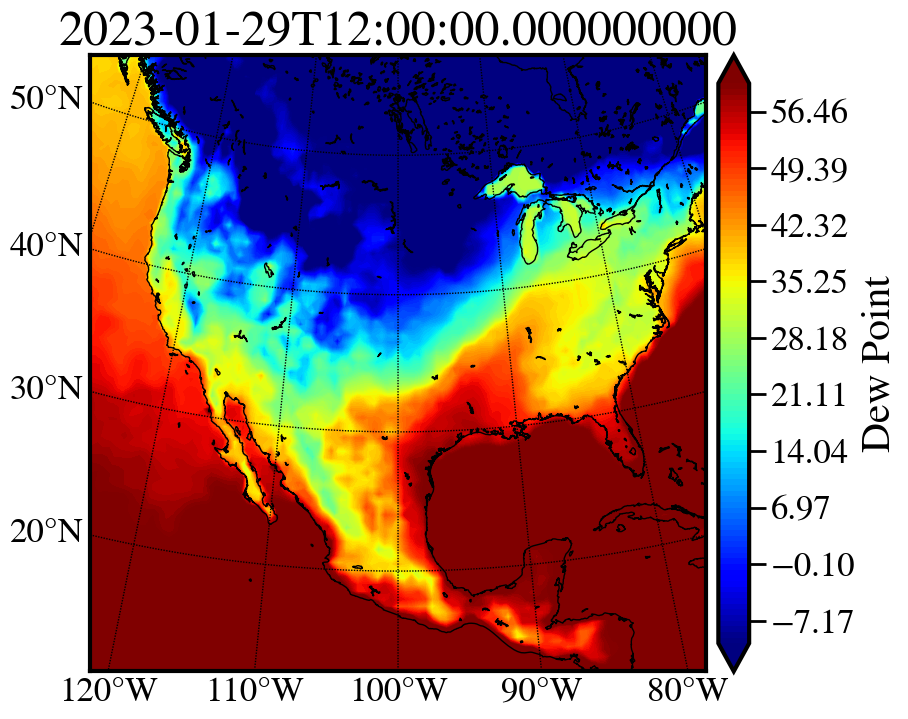

In [90]:
#norm = colors.Normalize(vmin=-10, vmax=100)
cs = m.contourf(xx,yy,t.to('fahrenheit'),levels=np.linspace(-10,60,100),cmap=plt.cm.jet, extend='both')

m.colorbar(location='right',label='Dew Point')

m.drawcoastlines()
m.drawparallels(np.arange(-90.,120.,10.), labels=[1,0,0,0],fontsize=25)
m.drawmeridians(np.arange(0.,360.,10.), labels=[0,0,0,1],fontsize=25)
plt.title(test.TMP.refDate.data
         )
plt.show()

In [76]:
np.shape(t)

(65, 361, 720)